# Word Vector
A **word vector**, also known as word embedding, represents a word as a high-dimensional vector in a continuous vector space. The primary idea is to map words from a vocabulary to points in this space, such that the geometric relationships between vectors capture semantic relationships between words.

Let's denote the word vector for a word $w$ as $\mathbf{v}_w$. This vector is typically a column vector with $N$ dimensions, where $N$ is the chosen dimensionality of the word vectors.

For a given vocabulary $V$, each word $w$ is associated with a unique word vector $\mathbf{v}_w$. In mathematical terms:

$$\text{For } w \in V, \quad \mathbf{v}_w \in \mathbb{R}^N$$

## Word Token
A **word token** refers to the smallest unit of text in NLP. It represents an individual word or punctuation mark in a sentence. For example, in the sentence "The quick brown fox jumps over the lazy dog." there are nine word tokens: "The", "quick", "brown", "fox", "jumps", "over", "the", "lazy" and "dog".

## Word Type
**Word type** refers to the unique form or representation of a word in a language. It is essentially the base or dictionary form of a word, regardless of its inflections or variations. For instance, in English, the word types for various verb forms (e.g., "run," "ran," "running") is simply "run." 

## Document-level Co-occurence matrix
A **document-level co-occurrence matrix**, often denoted as $\mathbf{D}$, is typically a square matrix where each row and column corresponds to a unique word or term from the entire document corpus. The entry $\text{D}_{ij}$ in row $i$ and column $j$ represents the co-occurrence count or a measure of the co-occurrence strength between word $i$ and word $j$ across all the documents in the corpus.

Suppose we have the following corpus consisting of three sentences:
1. "I love programming."

2. "Programming is fun."

3. "I enjoy coding."

The vocabulary consists of the following words:

- `<start>`, 'I', 'love', 'programming', 'is', 'fun', 'enjoy', 'coding', `<end>`

A simplified co-occurrence matrix $\mathbf{D}$ for this corpus with a context window of size 1 (considering only adjacent words):
$$\mathbf{D} = \begin{bmatrix}
0 & 2 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
2 & 0 & 1 & 0 & 0 & 0 & 1 & 0 & 0 \\
0 & 1 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
1 & 0 & 1 & 0 & 1 & 0 & 0 & 0 & 1 \\
0 & 0 & 0 & 1 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 1 \\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 1 \\
0 & 0 & 0 & 1 & 0 & 1 & 0 & 1 & 0 \\
\end{bmatrix}$$

In this matrix:

- Rows and columns represent words, including the `<start>` and `<end>` tokens (which helps capture the unique context at the beginning and end of sentences).

- The entry $\text{D}_{ij}$ represents the number of times word $i$ co-occurs with word $j$ within a context window of size 1.

- For example, $\text{D}_{23} = 1$ because "I" and "love" appear together in the first sentence.

- $\text{D}_{12} = 2$ and $\text{D}_{21} = 2$ is because "I" and `<start>` appear together twice.

Furthermore, the probability of word $j$ appearing in the context of word $i$ can be expressed as:
$$p_{ij} = \frac{\text{D}_{ij}}{\sum_k \text{D}_{ik}}$$

In [54]:
import numpy as np
import re 


In [2]:
def create_vocab(corpus):
    '''
    Create a vocabulary list from a given corpus
    '''
    vocab_set = set()
    vocab_list = ['<start>']
    for sentence in corpus:
        words = [word.lower() for word in re.findall(r'\w+', sentence)]
        # re.findall() is a Python regular expression (regex) operation that extracts all the words from a given sentence and returns them as a list
        for word in words:
            if word not in vocab_set:
                vocab_set.add(word)
                vocab_list.append(word)
    vocab_list += ['<end>']
    return vocab_list

def co_occurrence_matrix(corpus, vocab, window_size=1):
    vocab_size = len(vocab)
    co_occurrence_matrix = np.zeros((vocab_size, vocab_size), dtype=int)
    vocab = [word.lower() for word in vocab]  # Convert tokens to lowercase

    for sentence in corpus:  
        # Tokenize the sentence and add '<start>' and '<end>' tokens
        tokens = ['<start>'] + [token.lower() for token in re.findall(r'\w+', sentence)] + ['<end>']  
        sentence_length = len(tokens)

        for i in range(sentence_length):
            start = max(0, i - window_size)  # Prevent index out-of-range
            end = min(sentence_length, i + window_size + 1)
            for j in range(start, end):  # Iterate through the context words and update the co-occurrence matrix
                if i != j:
                    word_i = vocab.index(tokens[i])
                    word_j = vocab.index(tokens[j])
                    co_occurrence_matrix[word_i][word_j] += 1

    return co_occurrence_matrix

corpus = [
    "I love programming.",
    "Programming is fun.",
    "I enjoy coding."
]

print(create_vocab(corpus))
D = co_occurrence_matrix(corpus, create_vocab(corpus))
D


['<start>', 'i', 'love', 'programming', 'is', 'fun', 'enjoy', 'coding', '<end>']


array([[0, 2, 0, 1, 0, 0, 0, 0, 0],
       [2, 0, 1, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 1, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1],
       [0, 0, 0, 1, 0, 1, 0, 1, 0]])

In [3]:
p_23 = D[1, 2] / np.sum(D[1,:])
p_23


0.25

#### Dimensional Embedding
**Singular Value Decomposition (SVD)** is a dimensionality reduction technique that can be applied to co-occurrence matrices to obtain lower-dimensional word embeddings. The goal is to factorize the co-occurrence matrix $\mathbf{D}$ into three matrices. The factorization can be expressed as:
$$\mathbf{D} = \mathbf{U} \cdot \mathbf{S} \cdot \mathbf{V}^{\top}$$

where
- $\mathbf{U}$ has dimensions (number of words) x (number of concepts).

- $\mathbf{S}$ has dimensions (number of concepts) x (number of concepts).

- $\mathbf{V}^{\top}$ has dimensions (number of concepts) x (number of words).

By selecting the top k singular values and their corresponding columns in $\mathbf{U}$ and $\mathbf{V}^{\top}$, we obtain lower-dimensional word embeddings. These embeddings capture the semantic relationships between words based on their co-occurrence patterns in the corpus.

In [4]:
corpus_SVD = [
    "I woke up early in the morning and went for a jog.",
    "After jogging, I made a healthy breakfast.",
    "I spent the afternoon working on my computer.",
    "In the evening, I met with friends for dinner.",
    "Before bedtime, I read a book to relax.",
]

D_SVD = co_occurrence_matrix(corpus_SVD, create_vocab(corpus_SVD), window_size=2)
D_SVD.shape


(36, 36)

In [ ]:
from sklearn.decomposition import TruncatedSVD

In [5]:
svd = TruncatedSVD(n_components=2)
D_reduced = svd.fit_transform(D_SVD)
D_reduced.shape


(36, 2)

##### NLTK (Natural Language Toolkit)
**NLTK** is a widely used Python library for working with human language data and performing various NLP tasks. It provides a comprehensive set of tools, resources, and libraries for NLP research, development, and experimentation. 

In [ ]:
import nltk
from nltk.corpus import reuters
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [6]:
nltk.download('reuters')
nltk.download('punkt')


[nltk_data] Error loading reuters: <urlopen error [Errno 8] nodename
[nltk_data]     nor servname provided, or not known>
[nltk_data] Error loading punkt: <urlopen error [Errno 8] nodename nor
[nltk_data]     servname provided, or not known>


False

In [7]:
def create_reuters_vocab(corpus):
    '''
    Create a vocabulary list from a given reuters corpus
    '''
    vocab = set()
    for sentence in corpus:
        for word in sentence:
            vocab.add(word.lower())
    return sorted(list(vocab))

def reuters_co_occurrence_matrix(corpus, vocab, window_size=2):
    vocab_size = len(vocab)
    co_occurence_matrix = np.zeros((vocab_size, vocab_size))
    word_to_index = {word: index for index, word in enumerate(vocab)}  # Creates a dictionary to map words to their corresponding indices in the vocabulary

    for sentence in corpus:
        for i, target_word in enumerate(sentence):
            for j in range(max(i - window_size, 0), min(i + window_size + 1, len(sentence))):
                context_word = sentence[j]
                if i != j:
                    co_occurence_matrix[word_to_index[target_word.lower()]][word_to_index[context_word.lower()]] += 1

    return co_occurence_matrix


In [8]:
corpus_reuters = reuters.sents()  # Returns a list of sentences from the Reuters Corpu
vocab_reuters = create_reuters_vocab(corpus_reuters)
D_SVD_reuters = reuters_co_occurrence_matrix(corpus_reuters, vocab_reuters, window_size=2)
D_SVD_reuters.shape


(31077, 31077)

In [9]:
scaler = StandardScaler()
D_SVD_reuters_standardized = scaler.fit_transform(D_SVD_reuters)
svd_reuters = TruncatedSVD(n_components=2)
D_reduced_reuters = svd_reuters.fit_transform(D_SVD_reuters_standardized)
D_reduced_reuters.shape


(31077, 2)

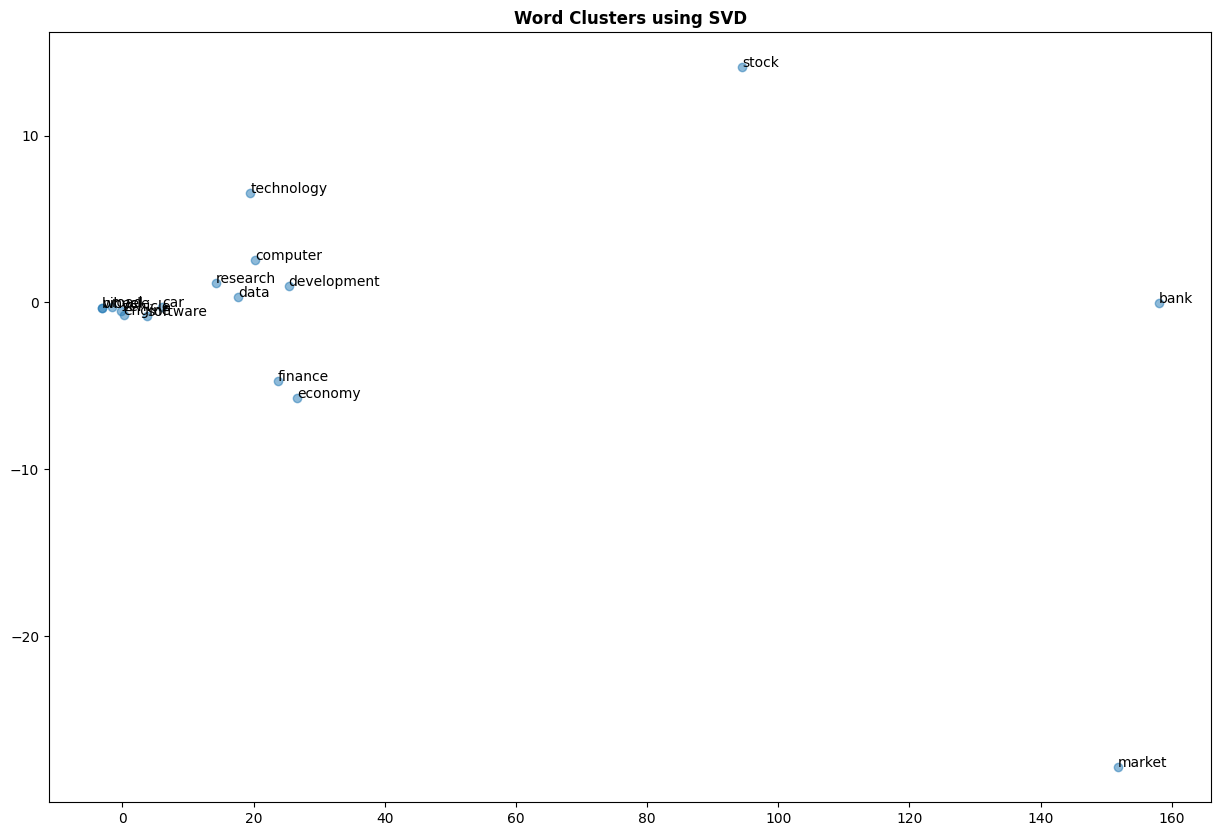

In [10]:
words_to_plot = ['technology', 'research', 'development', 'computer', 'software', 'data', 
                 'economy', 'finance', 'bank', 'stock', 'market',
                 'car', 'engine', 'wheel', 'road', 'vehicle', 'bicycle']
word_indices = [vocab_reuters.index(word) for word in words_to_plot]

plt.figure(figsize=(15, 10))
plt.scatter(D_reduced_reuters[word_indices, 0], D_reduced_reuters[word_indices, 1], alpha=0.5)
for i, word in enumerate(words_to_plot):
    plt.annotate(word, (D_reduced_reuters[word_indices[i], 0], D_reduced_reuters[word_indices[i], 1]))
plt.title('Word Clusters using SVD', weight='bold')
plt.show()


It can be observed that words related to the "technology" and "transportation" categories form distinct clusters. However, the clustering effect for words related to the "finance" category is not very obvious.

## Word2Vec
### Skip-gram 
The **Skip-gram** model is one of the two architectures used in the Word2Vec, which predicts the context words from a given target word.

The probability of observing a context word $c$ given a target word $t$ can be denoted as:
$$P(c|t) = \frac{e^{\boldsymbol{v}_c^{\top}\boldsymbol{v}_t}}{\sum_{i=1}^{V} e^{\boldsymbol{v}_i^{\top}\boldsymbol{v}_t}}$$
where
- $\boldsymbol{v}_c$ is the word vector of the context word $c$.
- $\boldsymbol{v}_t$ is the word vector of the target word $t$.
- $V$ is the size of the finite vocabulary.

The goal during training is to minimize this empirical loss by adjusting the word vectors $\boldsymbol{v}_c$ and $\boldsymbol{v}_t$. The loss function can be represented as follows:
$$\mathcal{L} = -\sum_{t=1}^{T} \sum_{c \in C_t} \left( \log \left( P(c|t) \right) \right)$$
where
- $T$ is the total number of target-context pairs in the training corpus.
- $C_t$ is the set of context words associated with the target word $t$ in the training data.

Find the gradient of $\mathcal{L}$ with respect to $\boldsymbol{v}_t$:
\begin{align*}
\frac{\partial \mathcal{L}}{\partial \boldsymbol{v}_t} &= \frac{\partial}{\partial \boldsymbol{v}_t} \left( -\sum_{t=1}^{T} \sum_{c \in C_t} \log \left( P(c|t) \right) \right) \\
&= -\sum_{t=1}^{T} \sum_{c \in C_t} \frac{\partial}{\partial \boldsymbol{v}_t} \log \left( P(c|t) \right)
\end{align*}

Focus on the derivative of the logarithm term:
\begin{align*}
\frac{\partial}{\partial \boldsymbol{v}_t} \log \left( P(c|t) \right) &= \frac{\partial}{\partial \boldsymbol{v}_t} \left( \log \left( \frac{e^{\boldsymbol{v}_c^{\top}\boldsymbol{v}_t}}{\sum_{i=1}^{V} e^{\boldsymbol{v}_i^{\top}\boldsymbol{v}_t}} \right) \right) \\
&= \frac{\partial}{\partial \boldsymbol{v}_t} \left( \boldsymbol{v}_c^{\top}\boldsymbol{v}_t - \log \left( \sum_{i=1}^{V} e^{\boldsymbol{v}_i^{\top}\boldsymbol{v}_t} \right) \right) \\
&= \frac{\partial}{\partial \boldsymbol{v}_t} \left( \boldsymbol{v}_c^{\top}\boldsymbol{v}_t \right) - \frac{\partial}{\partial \boldsymbol{v}_t} \left( \log \left( \sum_{i=1}^{V} e^{\boldsymbol{v}_i^{\top}\boldsymbol{v}_t} \right) \right) \\
&= \boldsymbol{v}_c - \frac{1}{\sum_{i=1}^{V} e^{\boldsymbol{v}_i^{\top}\boldsymbol{v}_t}} \cdot \frac{\partial}{\partial \boldsymbol{v}_t} \left( \sum_{i=1}^{V} e^{\boldsymbol{v}_i^{\top}\boldsymbol{v}_t} \right)
\end{align*}

Differentiate the sum inside the last term:
\begin{align*}
\frac{\partial}{\partial \boldsymbol{v}_t} \left( \sum_{i=1}^{V} e^{\boldsymbol{v}_i^{\top}\boldsymbol{v}_t} \right) &= \sum_{i=1}^{V} \frac{\partial}{\partial \boldsymbol{v}_t} \left( e^{\boldsymbol{v}_i^{\top}\boldsymbol{v}_t} \right) \\
&= \sum_{i=1}^{V} e^{\boldsymbol{v}_i^{\top}\boldsymbol{v}_t} \cdot \frac{\partial}{\partial \boldsymbol{v}_t} \left( \boldsymbol{v}_i^{\top}\boldsymbol{v}_t \right) \\ &= \sum_{i=1}^{V} e^{\boldsymbol{v}_i^{\top}\boldsymbol{v}_t} \cdot \boldsymbol{v}_i
\end{align*}

Thus, the gradient of the empirical loss $\mathcal{L}$ with respect to the word vector $\boldsymbol{v}_t$ is given by:
$$\frac{\partial \mathcal{L}}{\partial \boldsymbol{v}_t} = -\boldsymbol{v}_c + \sum_{i=1}^{V} \left( P(i|t) \cdot \boldsymbol{v}_i \right)$$

#### Gradient Descent
To update the word vectors during training, gradient descent is used. The update rule for a given word vector $\boldsymbol{v}$ can be written as:
$$\boldsymbol{v} \leftarrow \boldsymbol{v} - \alpha \frac{\partial \mathcal{L}}{\partial \boldsymbol{v}}$$
where
- $\boldsymbol{v}$ is the word vector being updated ($\boldsymbol{v}_c$ or $\boldsymbol{v}_t$).
- $\alpha$ is the learning rate.
- $\frac{\partial \mathcal{L}}{\partial \boldsymbol{v}}$ is the gradient of the loss with respect to the word vector.

When initializing word vectors in Word2Vec, it is common practice to choose initial values from a zero-centered normal distribution with small variance:
$$\boldsymbol{v}_0 \sim \mathcal{N}(0, \sigma^2)$$
where
- $\boldsymbol{v}_0$ represents the initial word vector.
- $\mathcal{N}(0, \sigma^2)$ denotes a normal distribution with mean $\mu$ of 0 and variance $\sigma^2$ (it may be a small value like $0.0001$).

#### Skip-gram with Negative Sampling (SGNS)
**Skip-gram with Negative Sampling (SGNS)** is an extension of the Skip-gram model in Word2Vec that addresses efficiency and scalability issues. It modifies the training objective and updates word vectors differently compared to the original Skip-gram model. 

Due to the computational burden of the partition function $\sum_{i=1}^{V} e^{\boldsymbol{v}_i^{\top}\boldsymbol{v}_t}$, the objective loss function of SGNS is defined as follows:
$$\mathcal{L}_{\text{SGNS}} = \sum_{(t, c) \in D} \left(\log\left(\sigma({\boldsymbol{v}_t}^\top \boldsymbol{v}_c)\right) + \sum_{n \in N_{(t, c)}}\log\left(\sigma(-{\boldsymbol{v}_t}^\top \boldsymbol{v}_n)\right)\right)$$
   
where
   - $\sigma(x)$ is the sigmoid function: $\sigma(x) = \frac{1}{1 + e^{-x}}$.
   - $\boldsymbol{v}_n$ represents the vector representation of a negatively sampled word $n$.
   - $D$ is the set of all target-context pairs in the training data.
   - $N_{(t, c)}$ is a set of randomly sampled negative words for each target-context pair $(t, c)$.

Instead of considering all words in the vocabulary as context words, SGNS uses negative sampling to randomly select a small number of negative words for each target-context pair. The number of negative samples is typically much smaller than the vocabulary size, making training more efficient.

### Model Training
The 'text8' dataset is a preprocessed version of a larger text corpus which is derived from a section of the English Wikipedia dump.

In [ ]:
import gensim.downloader as api
from gensim.models.word2vec import Word2Vec


In [11]:
text8 = api.load('text8')
model = Word2Vec(text8, window=5, sg=1)  # sg=1 stands for skip-gram
# window=5 means that the model considers a window of 5 words around the target word to define the context words


In [50]:
vector = model.wv['cat']
print(vector)


[ 3.93831357e-02 -2.48709828e-01 -3.07246536e-01 -5.48084378e-02
  6.23322167e-02 -3.31573725e-01  1.62922755e-01 -5.70484139e-02
 -7.15279281e-01 -1.33003592e-01 -3.11161965e-01  1.48305044e-01
  1.88538447e-01  1.06979005e-01 -7.22236753e-01  1.40634716e-01
  5.61691113e-02 -1.31795272e-01  1.40669286e-01 -1.46179423e-01
  3.93533111e-01 -4.19672787e-01  4.63384181e-01 -1.79108247e-01
 -9.98327062e-02  4.53920245e-01  4.83672082e-01 -5.76836050e-01
  4.74936217e-02  2.47785952e-02  7.03693092e-01  9.59773660e-02
  2.96722591e-01 -4.02793616e-01  1.19088039e-01  3.11436355e-02
 -4.58852172e-01  2.44439736e-01  7.40866596e-03 -5.30050218e-01
  1.89117119e-01 -1.75361022e-01 -5.07434867e-02  7.82758668e-02
  3.41709942e-01 -1.46080539e-01  2.64961302e-01 -1.04784481e-01
  1.51961699e-01  1.24260867e+00  1.18939146e-01 -1.37962058e-01
 -1.88113854e-03  1.63256288e-01 -3.86705875e-01 -2.44599745e-01
  5.11721492e-01  2.10976556e-01 -6.90365374e-01  1.06162518e-01
  5.17385125e-01  1.69614

In [46]:
different_word = model.wv.doesnt_match(['king', 'queen', 'car', 'throne'])
print(different_word)


car


In [48]:
different_word = model.wv.doesnt_match(['tea', 'coffee', 'cat', 'drinks'])
print(different_word)


cat


## Cosine Similarity

In the realm of word vectors, such as those generated by Word2Vec, GloVe, or other word embedding techniques, **cosine similarity** plays a pivotal role in quantifying the semantic similarity between words. Each word in a vector space is represented by a high-dimensional vector, and cosine similarity provides a measure of how similar or dissimilar these word vectors are.

For two word vectors $\boldsymbol{v}_1$ and $\boldsymbol{v}_2$, the cosine similarity score $s$ is computed using the following formula:
$$s(\boldsymbol{v}_1, \boldsymbol{v}_2) = \frac{\boldsymbol{v}_1 \cdot \boldsymbol{v}_2}{\|\boldsymbol{v}_1\| \cdot \|\boldsymbol{v}_2\|}$$

The resulting cosine similarity score ranges from -1 to 1:
- **1 :** Indicates perfect similarity, implying that the word vectors point in the same direction in the vector space.

- **0 :** Implies no similarity, suggesting that the word vectors are orthogonal (perpendicular) to each other.

- **-1 :** Represents perfect dissimilarity, indicating that the word vectors point in opposite directions.

In [12]:
similar_words = model.wv.most_similar('tea', topn=10)

print("Words similar to 'tea':")
for word, score in similar_words:
    print(f"{word}: {score}")


Words similar to 'tea':
liquor: 0.7519081234931946
drinks: 0.7436230182647705
snack: 0.7245787978172302
juice: 0.7087721824645996
vodka: 0.7079149484634399
milk: 0.7078024744987488
beef: 0.7069180011749268
coffee: 0.7068060040473938
baked: 0.7047387361526489
potato: 0.7037311792373657


In [13]:
similar_words = model.wv.most_similar('car', topn=10)

print("Words similar to 'car':")
for word, score in similar_words:
    print(f"{word}: {score}") 


Words similar to 'car':
cars: 0.8056241273880005
motorcycle: 0.801584005355835
automobile: 0.7930898070335388
driver: 0.7555641531944275
truck: 0.7512812614440918
racing: 0.7225911617279053
sidecar: 0.7204707860946655
automobiles: 0.7169302701950073
volkswagen: 0.7117175459861755
racer: 0.7031869888305664


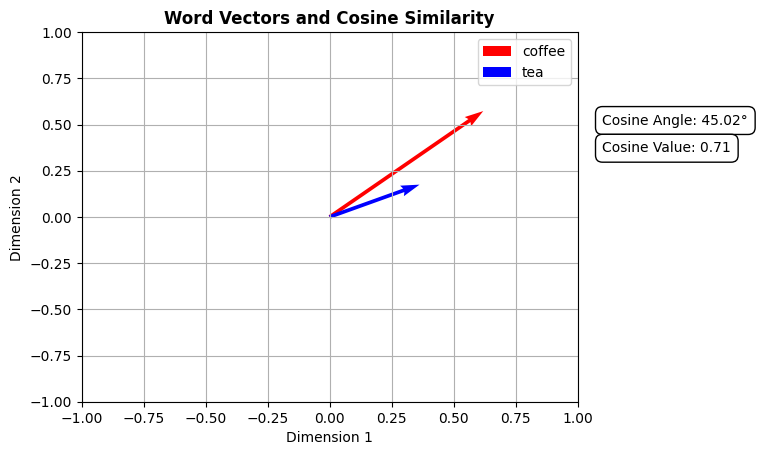

In [40]:
def plot_cosine_similarity(vectors, labels):
    fig, ax = plt.subplots()

    # Plot vectors
    ax.quiver(0, 0, vectors[0, 0], vectors[0, 1], angles='xy', scale_units='xy', scale=1, color='r', label=labels[0])
    ax.quiver(0, 0, vectors[1, 0], vectors[1, 1], angles='xy', scale_units='xy', scale=1, color='b', label=labels[1])

    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    ax.set_xlabel('Dimension 1')
    ax.set_ylabel('Dimension 2')
    ax.legend()

    # Add cosine similarity angle and score
    angle_rad = np.arccos(np.dot(vectors[0], vectors[1]) / (np.linalg.norm(vectors[0]) * np.linalg.norm(vectors[1])))
    angle_deg = np.degrees(angle_rad)
    similarity_score = np.dot(vectors[0], vectors[1]) / (np.linalg.norm(vectors[0]) * np.linalg.norm(vectors[1]))

    plt.grid(True)
    plt.title('Word Vectors and Cosine Similarity', weight='bold')
    plt.text(1.1, 0.5, f'Cosine Angle: {angle_deg:.2f}°', fontsize=10, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
    plt.text(1.1, 0.35, f'Cosine Value: {similarity_score:.2f}', fontsize=10, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
    plt.show()

vector_1 = model.wv['coffee']
vector_2 = model.wv['tea']
vectors = np.array([vector_1, vector_2])
labels = ['coffee', 'tea']

plot_cosine_similarity(vectors, labels)


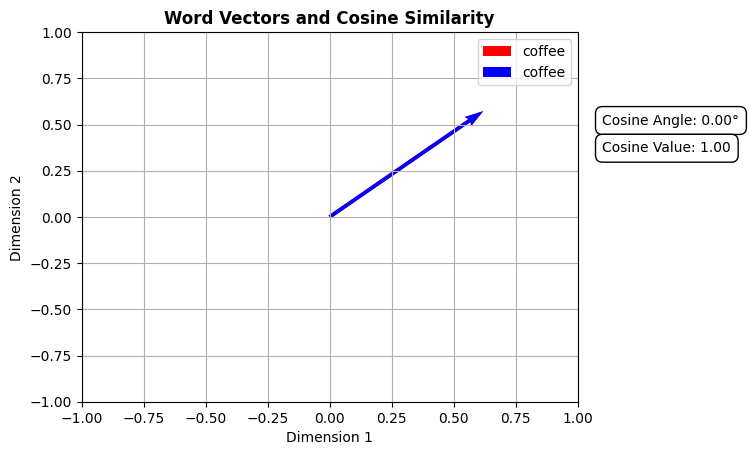

In [41]:
vector_1 = model.wv['coffee']
vector_2 = model.wv['coffee']
vectors = np.array([vector_1, vector_2])
labels = ['coffee', 'coffee']

plot_cosine_similarity(vectors, labels)


## GloVe
**GloVe (Global Vectors for Word Representation)** is another popular word embedding technique in natural language processing. Unlike Word2Vec, which uses a predictive model to learn word embeddings, GloVe is based on a global count-based approach that leverages word co-occurrence statistics from a large corpus. 

Consider the loss function:
$$\mathcal{L} = -\sum_{t=1}^{T} \sum_{c \in C_t} \left( \log \left( P(c|t) \right) \right)$$

Change the loss function to capture word co-occurrence statistics more effectively:
$$\mathcal{L} = -\sum_{t=1}^{W} \sum_{c=1}^{W} \mathbf{D}_{tc} \left( \log \left( P(c|t) \right) \right)$$

where $W$ is the number of unique words (including `<start>` and `<end>`) in the co-occurence matrix.

Due to the computational burden of the partition function $\sum_{i=1}^{V} e^{\boldsymbol{v}_i^{\top}\boldsymbol{v}_t}$, the loss function can be redefined as:
$$\hat{\mathcal{L}} = \sum_{t=1}^{W} \sum_{c=1}^{W} \left(\sum_{k=1}^{W} \mathbf{D}_{ik} \right)\left(\mathbf{D}_{tc} - e^{\boldsymbol{v}_c^{\top}\boldsymbol{v}_t} \right)^2$$

However, in practice, the value of $\mathbf{D}_{tc}$ is often large, making the optimization process quite complex. Thus, applying the logarithms on $\mathbf{D}_{tc}$ and $e^{\boldsymbol{v}_c^{\top}\boldsymbol{v}_t}$ is an efficient way:
$$\begin{align*}
\hat{\mathcal{L}} &= \sum_{t=1}^{W} \sum_{c=1}^{W} \left(\sum_{k=1}^{W} \mathbf{D}_{ik} \right)\left(\log{\mathbf{D}_{tc}} - \log{e^{\boldsymbol{v}_c^{\top}\boldsymbol{v}_t}} \right)^2\\
&= \sum_{t=1}^{W} \sum_{c=1}^{W} \left(\sum_{k=1}^{W} \mathbf{D}_{ik} \right)\left(\boldsymbol{v}_c^{\top}\boldsymbol{v}_t - \log{\mathbf{D}_{tc}}\right)^2
\end{align*}$$

The weighted function $f(\cdot)$ is adaptable to various situations:
$$\hat{\mathcal{L}} = \sum_{t=1}^{W} \sum_{c=1}^{W} f(\mathbf{D}_{tc}) \left(\log{\mathbf{D}_{tc}} - \log{e^{\boldsymbol{v}_c^{\top}\boldsymbol{v}_t}} \right)^2$$